In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('GDB_24042024.csv', sep=';')
df.head()

,Date transaction,Date comptabilisation,Num Compte,Libellé Compte,Libellé opération,Libellé complet,Catégorie,Sous-Catégorie,Montant,Pointée,Unnamed: 10
0,22/04/2024,22/04/2024,53012671,compte commun,PRELEVEMENT EUROPEEN DE: Orange SA,PRELEVEMENT EUROPEEN 1604614191 DE: Orange SA ...,Abonnements et téléphonie,téléphonie (fixe et mobile),-30.99,Non,NaN
1,22/04/2024,22/04/2024,53012671,compte commun,CARTE X5090 21/04 NETFLIX COM COMMERCE ELECTRO...,CARTE X5090 21/04 NETFLIX COM COMMERCE ELECTRO...,Abonnements et téléphonie,Multimedia à domicile (TV. internet. téléphonie),-25.98,Non,NaN
2,22/04/2024,22/04/2024,53012671,compte commun,CARTE X5090 21/04 BROLANGERIE,CARTE X5090 21/04 BROLANGERIE,Vie quotidienne,Alimentation,-6.59,Non,NaN
3,22/04/2024,22/04/2024,53012671,compte commun,CARTE X5090 19/04 LA VIE CLAIRE,CARTE X5090 19/04 LA VIE CLAIRE,Vie quotidienne,Alimentation,-6.53,Non,NaN
4,22/04/2024,22/04/2024,53012671,compte commun,CARTE X5090 19/04 SM CASINO CS164,CARTE X5090 19/04 SM CASINO CS164,Vie quotidienne,Alimentation,-14.13,Non,NaN


In [3]:
df.drop(columns=['Unnamed: 10', 'Pointée'], inplace=True)
df.head()

,Date transaction,Date comptabilisation,Num Compte,Libellé Compte,Libellé opération,Libellé complet,Catégorie,Sous-Catégorie,Montant
0,22/04/2024,22/04/2024,53012671,compte commun,PRELEVEMENT EUROPEEN DE: Orange SA,PRELEVEMENT EUROPEEN 1604614191 DE: Orange SA ...,Abonnements et téléphonie,téléphonie (fixe et mobile),-30.99
1,22/04/2024,22/04/2024,53012671,compte commun,CARTE X5090 21/04 NETFLIX COM COMMERCE ELECTRO...,CARTE X5090 21/04 NETFLIX COM COMMERCE ELECTRO...,Abonnements et téléphonie,Multimedia à domicile (TV. internet. téléphonie),-25.98
2,22/04/2024,22/04/2024,53012671,compte commun,CARTE X5090 21/04 BROLANGERIE,CARTE X5090 21/04 BROLANGERIE,Vie quotidienne,Alimentation,-6.59
3,22/04/2024,22/04/2024,53012671,compte commun,CARTE X5090 19/04 LA VIE CLAIRE,CARTE X5090 19/04 LA VIE CLAIRE,Vie quotidienne,Alimentation,-6.53
4,22/04/2024,22/04/2024,53012671,compte commun,CARTE X5090 19/04 SM CASINO CS164,CARTE X5090 19/04 SM CASINO CS164,Vie quotidienne,Alimentation,-14.13


In [4]:
df['Catégorie'].value_counts()
data = df[df['Libellé Compte'] == 'compte commun']
data = data.drop(columns=['Num Compte','Libellé Compte','Date comptabilisation','Libellé opération'])

In [5]:
data.head()

,Date transaction,Libellé complet,Catégorie,Sous-Catégorie,Montant
0,22/04/2024,PRELEVEMENT EUROPEEN 1604614191 DE: Orange SA ...,Abonnements et téléphonie,téléphonie (fixe et mobile),-30.99
1,22/04/2024,CARTE X5090 21/04 NETFLIX COM COMMERCE ELECTRO...,Abonnements et téléphonie,Multimedia à domicile (TV. internet. téléphonie),-25.98
2,22/04/2024,CARTE X5090 21/04 BROLANGERIE,Vie quotidienne,Alimentation,-6.59
3,22/04/2024,CARTE X5090 19/04 LA VIE CLAIRE,Vie quotidienne,Alimentation,-6.53
4,22/04/2024,CARTE X5090 19/04 SM CASINO CS164,Vie quotidienne,Alimentation,-14.13


In [6]:
data['Libellé simplifié'] = data['Libellé complet']
data.head()

,Date transaction,Libellé complet,Catégorie,Sous-Catégorie,Montant,Libellé simplifié
0,22/04/2024,PRELEVEMENT EUROPEEN 1604614191 DE: Orange SA ...,Abonnements et téléphonie,téléphonie (fixe et mobile),-30.99,PRELEVEMENT EUROPEEN 1604614191 DE: Orange SA ...
1,22/04/2024,CARTE X5090 21/04 NETFLIX COM COMMERCE ELECTRO...,Abonnements et téléphonie,Multimedia à domicile (TV. internet. téléphonie),-25.98,CARTE X5090 21/04 NETFLIX COM COMMERCE ELECTRO...
2,22/04/2024,CARTE X5090 21/04 BROLANGERIE,Vie quotidienne,Alimentation,-6.59,CARTE X5090 21/04 BROLANGERIE
3,22/04/2024,CARTE X5090 19/04 LA VIE CLAIRE,Vie quotidienne,Alimentation,-6.53,CARTE X5090 19/04 LA VIE CLAIRE
4,22/04/2024,CARTE X5090 19/04 SM CASINO CS164,Vie quotidienne,Alimentation,-14.13,CARTE X5090 19/04 SM CASINO CS164


In [7]:
data.head()

,Date transaction,Libellé complet,Catégorie,Sous-Catégorie,Montant,Libellé simplifié
0,22/04/2024,PRELEVEMENT EUROPEEN 1604614191 DE: Orange SA ...,Abonnements et téléphonie,téléphonie (fixe et mobile),-30.99,PRELEVEMENT EUROPEEN 1604614191 DE: Orange SA ...
1,22/04/2024,CARTE X5090 21/04 NETFLIX COM COMMERCE ELECTRO...,Abonnements et téléphonie,Multimedia à domicile (TV. internet. téléphonie),-25.98,CARTE X5090 21/04 NETFLIX COM COMMERCE ELECTRO...
2,22/04/2024,CARTE X5090 21/04 BROLANGERIE,Vie quotidienne,Alimentation,-6.59,CARTE X5090 21/04 BROLANGERIE
3,22/04/2024,CARTE X5090 19/04 LA VIE CLAIRE,Vie quotidienne,Alimentation,-6.53,CARTE X5090 19/04 LA VIE CLAIRE
4,22/04/2024,CARTE X5090 19/04 SM CASINO CS164,Vie quotidienne,Alimentation,-14.13,CARTE X5090 19/04 SM CASINO CS164


In [8]:
for index in data.index:
    str = data.loc[index, 'Libellé simplifié']
    if str.find('LA VIE CLAIRE') != -1:
        data.loc[index, 'Libellé simplifié'] = 'LA VIE CLAIRE'
    elif str.find('CASINO') != -1:
        data.loc[index, 'Libellé simplifié'] = 'CASINO'
    elif str.find('NETFLIX') != -1:
        data.loc[index, 'Libellé simplifié'] = 'NETFLIX'
    elif str.find('LECLERC') != -1:
        data.loc[index, 'Libellé simplifié'] = 'LECLERC'
    elif str.find('PICARD') != -1:
        data.loc[index, 'Libellé simplifié'] = 'PICARD'
    elif (str.find('JAZZ JEUNE ACTIF') != -1) | (str.find('COTIS') != -1) | (str.find('INTERETS') != -1):
        data.loc[index, 'Libellé simplifié'] = 'BANQUE'
    elif str.find("Prelevement Avis d'echeance") != -1:
        data.loc[index, 'Libellé simplifié'] = 'LOYER'
    elif str.find('Tipeee') != -1:
        data.loc[index, 'Libellé simplifié'] = 'Tipeee'
    elif str.find('CAF ISERE') != -1:
        data.loc[index, 'Libellé simplifié'] = 'CAF'
    elif str.find('GAZ ET ELECTRICITE') != -1:
        data.loc[index, 'Libellé simplifié'] = 'GAZ ET ELECTRICITE'
    elif (str.find('TACOS') != -1) | (str.find('AU BOEUF CHAROLAIS') != -1) | (str.find('O CALLAGHAN') != -1) | (str.find('OASIS') != -1):
        data.loc[index, 'Libellé simplifié'] = 'RESTAURANT'
    elif str.find('KALIWEAR') != -1:
        data.loc[index, 'Libellé simplifié'] = 'VETEMENT'
    elif str.find('CARREFOUR') != -1:
        data.loc[index, 'Libellé simplifié'] = 'CARREFOUR'
    elif (str.find('CORALIE') != -1) | (str.find('LENNY') != -1) | (str.find('Lenny') != -1):
        data.loc[index, 'Libellé simplifié'] = 'VIREMENT'
    elif (str.find('VIET HUNG') != -1) | (str.find('KING') != -1):
        data.loc[index, 'Libellé simplifié'] = 'VIET'
    elif str.find('Orange') != -1:
        data.loc[index, 'Libellé simplifié'] = 'INTERNET'
    elif str.find('SAS ENZO') != -1:
        data.loc[index, 'Libellé simplifié'] = 'SUPER U'
    elif str.find('PHARMACIE') != -1:
        data.loc[index, 'Libellé simplifié'] = 'PHARMACIE'
    elif (str.find('LE LABO') != -1) | (str.find('BLOC 27') != -1):
        data.loc[index, 'Libellé simplifié'] = 'BLOC'
    elif (str.find('STATIONNEMENT') != -1) | (str.find('DAC ECHIROLLES DISTRIBUT') != -1) | (str.find('CHORGES') != -1) | (str.find('SEMITAG') != -1) |(str.find('APRR') != -1):
        data.loc[index, 'Libellé simplifié'] = 'TRANSPORT'
    elif (str.find('QUENTIN') != -1) | (str.find('COLINE') != -1):
        data.loc[index, 'Libellé simplifié'] = 'REMBOURSEMENT AMIS'
    elif str.find('VIEUX CAMPEUR') != -1:
        data.loc[index, 'Libellé simplifié'] = 'VIEUX CAMPEUR'
    elif str.find('MINIMUM FORFAITAIRE') != -1:
        data.loc[index, 'Libellé simplifié'] = 'FRAIS DECOUVERT'
    elif (str.find('ALPES COULEURS') != -1) | (str.find('MEDIAPART') != -1) | (str.find('HASHTAG') != -1) | (str.find('GAMING') != -1) | (str.find('AMAZON') != -1):
        data.loc[index, 'Libellé simplifié'] = 'LOISIR'
    elif (str.find('COSTE JEAN MARI') != -1) | (str.find('NARDI') != -1) | (str.find('BROLANGERIE') != -1):
        data.loc[index, 'Libellé simplifié'] = 'BOULANGERIE'
    elif str.find('COMMERCE') != -1:
        data.loc[index, 'Libellé simplifié'] = 'AUTRE'
    elif str.find('CHEQUE') != -1:
        data.loc[index, 'Libellé simplifié'] = 'CADEAU'
    else:
        data.loc[index, 'Libellé simplifié'] = 'AUTRE'

    
        
    

In [9]:
print(data['Libellé simplifié'].value_counts(ascending=True))

Libellé simplifié
PHARMACIE              1
VETEMENT               1
PICARD                 1
FRAIS DECOUVERT        1
CADEAU                 1
BLOC                   2
SUPER U                3
VIEUX CAMPEUR          3
LECLERC                3
REMBOURSEMENT AMIS     3
BOULANGERIE            4
CARREFOUR              5
LOISIR                 5
INTERNET               6
LOYER                  6
NETFLIX                6
RESTAURANT             7
CAF                    8
TRANSPORT              9
AUTRE                  9
BANQUE                12
VIET                  12
Tipeee                12
GAZ ET ELECTRICITE    12
LA VIE CLAIRE         20
VIREMENT              21
CASINO                27
Name: count, dtype: int64


In [10]:
data.loc[data['Libellé simplifié'] == 'AUTRE']

,Date transaction,Libellé complet,Catégorie,Sous-Catégorie,Montant,Libellé simplifié
84,15/03/2024,CARTE X5090 14/03 Mol*Cookinglife B.V. 91.92 E...,Vie quotidienne,Livres. CD/DVD. bijoux. jouets,-91.92,AUTRE
186,18/12/2023,CARTE X5090 13/12 STEAM PURCHASE 37.99 EUR ALL...,Vie quotidienne,Electronique et informatique,-37.99,AUTRE
194,08/12/2023,CARTE X8837 07/12 L EPICEA,Loisirs,Restaurants. bars. discothèques,-4.20,AUTRE
235,09/11/2023,FRAIS PAIEMENT HORS ZONE EURO CARTE X8837 06/1...,Services financiers / professionnels,Frais bancaires et de gestion (dont agios),-2.13,AUTRE
241,08/11/2023,CARTE X8837 06/11 AMZNMktplace 36.10 GBP ROYAU...,Vie quotidienne,Livres. CD/DVD. bijoux. jouets,-41.68,AUTRE
245,07/11/2023,FRAIS PAIEMENT HORS ZONE EURO CARTE X8837 02/1...,Services financiers / professionnels,Frais bancaires et de gestion (dont agios),-1.31,AUTRE
253,06/11/2023,CARTE X8837 02/11 MIDJOURNEY INC. 12.00 USD ET...,Vie quotidienne,Electronique et informatique,-11.41,AUTRE
259,03/11/2023,CARTE X8837 30/10 CHAM COMMERCE ELECTRONIQUE,Vie quotidienne,Bricolage et jardinage,-149.16,AUTRE
283,24/10/2023,CARTE X8837 23/10 Amazon.UK Pa*H09S42AF4 51.58...,Vie quotidienne,Livres. CD/DVD. bijoux. jouets,-51.58,AUTRE


In [11]:
data['Montant'].astype(float)

0     -30.99
1     -25.98
2      -6.59
3      -6.53
4     -14.13
       ...  
279    50.00
280   -14.08
281   -22.62
282    50.00
283   -51.58
Name: Montant, Length: 200, dtype: float64

In [12]:
data['Date transaction'] = pd.to_datetime(data['Date transaction'], dayfirst=True)

In [13]:
data_par_type = data.groupby('Libellé simplifié')['Montant'].sum()
data_par_type

Libellé simplifié
AUTRE                 -391.38
BANQUE                -108.19
BLOC                   -38.90
BOULANGERIE            -22.84
CADEAU                 150.00
CAF                   6302.31
CARREFOUR             -197.20
CASINO                -452.79
FRAIS DECOUVERT         -7.00
GAZ ET ELECTRICITE    -690.00
INTERNET              -185.94
LA VIE CLAIRE         -292.15
LECLERC               -486.48
LOISIR                -135.72
LOYER                -4045.26
NETFLIX               -153.88
PHARMACIE               -3.50
PICARD                  -7.40
REMBOURSEMENT AMIS      23.97
RESTAURANT            -147.51
SUPER U                -12.59
TRANSPORT             -354.96
Tipeee                  49.08
VETEMENT                -6.04
VIET                  -262.85
VIEUX CAMPEUR          -21.55
VIREMENT              1635.00
Name: Montant, dtype: float64

In [14]:
data.sort_values('Catégorie')
montant = data.groupby('Catégorie')['Montant'].sum()
montant = montant.reset_index()
montant


,Catégorie,Montant
0,Abonnements et téléphonie,-351.82
1,Allocations,6302.31
2,Auto et Moto,-347.96
3,Dépots (cartes/chèques/espèces),150.00
4,Logement,-4735.26
5,Loisirs,-140.00
6,Mouvements internes créditeurs,1016.00
7,Non catégorisée,-42.07
8,Santé,-3.50
9,Services financiers / professionnels,-118.63


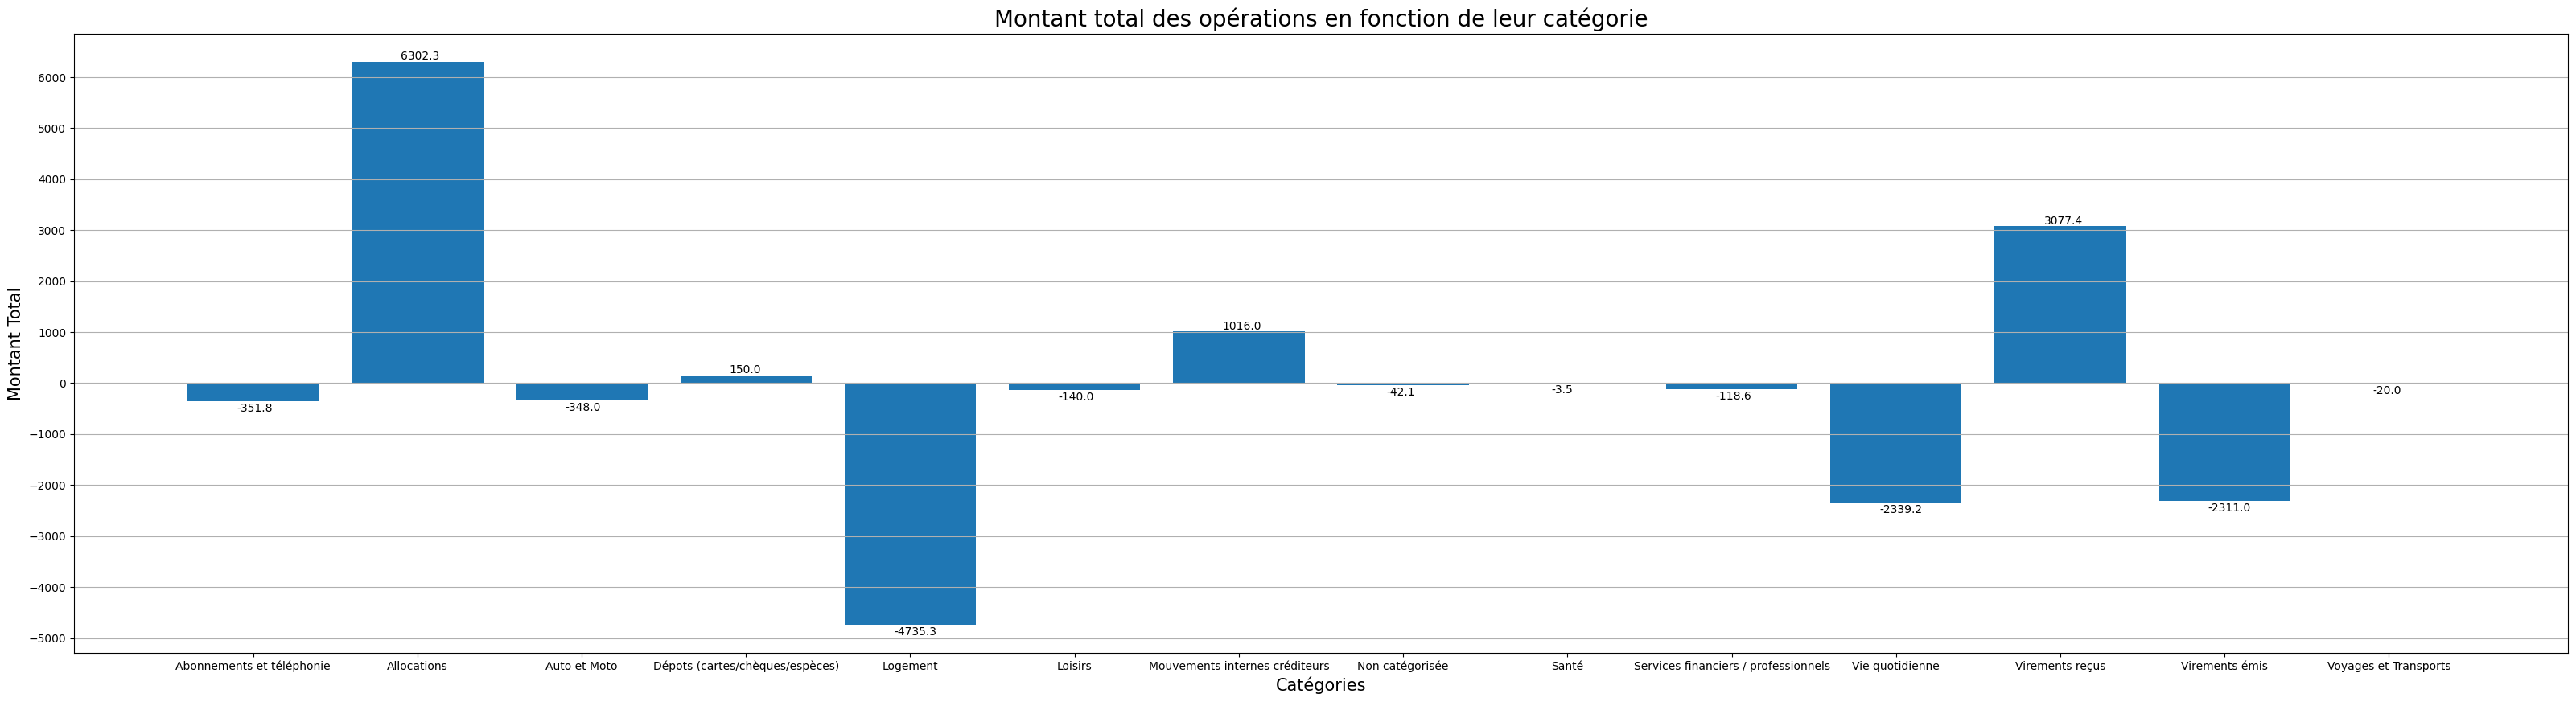

In [15]:
plt.figure(figsize=(40,10))
plt.ylabel("Montant Total", fontsize=15)
plt.xlabel("Catégories", fontsize=15)
plt.grid(axis='y')
plt.yticks([-5000,-4000, -3000, -2000, -1000, 0, 1000, 2000, 3000, 4000, 5000, 6000,7000])
plt.bar(x=montant["Catégorie"], height=montant["Montant"])
plt.title("Montant total des opérations en fonction de leur catégorie", fontsize=20)
montant_list = montant['Montant'].to_list()
for i in range(len(montant_list)):
    if montant_list[i] < 0:
        plt.text((i-0.1), (montant_list[i]-200), round(montant_list[i], 1))
    else:
        plt.text((i-0.1), (montant_list[i]+40), round(montant_list[i], 1))


In [16]:
data['Sous-Catégorie'].value_counts()

Sous-Catégorie
Alimentation                                        74
Frais bancaires et de gestion (dont agios)          13
Energie (électricité. gaz. fuel. chauffage)         12
Equipements sportifs et artistiques                  9
Virements reçus de comptes à comptes                 8
Restaurants. bars. discothèques                      8
Allocations familiales                               8
Multimedia à domicile (TV. internet. téléphonie)     6
téléphonie (fixe et mobile)                          6
Loyers. Charges                                      6
Carburant                                            4
Livres. CD/DVD. bijoux. jouets                       4
Electronique et informatique                         3
Transports quotidiens (métro. bus)                   3
Bricolage et jardinage                               3
P�ages                                               2
Remboursement de frais                               2
Journaux. magazines                               

In [17]:
data_alimentaire = data.loc[data['Sous-Catégorie'] == 'Alimentation']
# Extraction du mois de la date
data_alimentaire['mois'] = data_alimentaire['Date transaction'].dt.month

# Mappage des mois numériques pour trier correctement de octobre à avril
mois_mapping = {10: 1, 11: 2, 12: 3, 1: 4, 2: 5, 3: 6, 4: 7}

# Appliquer le mappage pour créer une nouvelle colonne de tri
data_alimentaire['mois_tri'] = data_alimentaire['mois'].map(mois_mapping)

# Trier les données selon la nouvelle colonne
data_alimentaire.sort_values('mois_tri', inplace=True)
data_alimentaire

C:\Users\Coralie\AppData\Local\Temp\ipykernel_22452\1247171495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_alimentaire['mois'] = data_alimentaire['Date transaction'].dt.month
C:\Users\Coralie\AppData\Local\Temp\ipykernel_22452\1247171495.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_alimentaire['mois_tri'] = data_alimentaire['mois'].map(mois_mapping)
C:\Users\Coralie\AppData\Local\Temp\ipykernel_22452\1247171495.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,Date transaction,Libellé complet,Catégorie,Sous-Catégorie,Montant,Libellé simplifié,mois,mois_tri
281,2023-10-25,CARTE X5090 24/10 LA VIE CLAIRE,Vie quotidienne,Alimentation,-22.62,LA VIE CLAIRE,10,1
266,2023-10-31,CARTE X5090 30/10 SM CASINO CS164,Vie quotidienne,Alimentation,-8.36,CASINO,10,1
267,2023-10-31,CARTE X5090 30/10 LA VIE CLAIRE,Vie quotidienne,Alimentation,-9.53,LA VIE CLAIRE,10,1
280,2023-10-25,CARTE X5090 24/10 SM CASINO CS164,Vie quotidienne,Alimentation,-14.08,CASINO,10,1
272,2023-10-30,CARTE X5090 28/10 SM CASINO CS164,Vie quotidienne,Alimentation,-11.38,CASINO,10,1
...,...,...,...,...,...,...,...,...
37,2024-04-04,CARTE X5090 03/04 SM CASINO CS164,Vie quotidienne,Alimentation,-8.33,CASINO,4,7
38,2024-04-04,CARTE X5090 03/04 SM CASINO CS164,Vie quotidienne,Alimentation,-21.14,CASINO,4,7
43,2024-04-03,CARTE X5090 02/04 LA VIE CLAIRE,Vie quotidienne,Alimentation,-14.99,LA VIE CLAIRE,4,7
20,2024-04-10,CARTE X5090 09/04 SM CASINO CS164,Vie quotidienne,Alimentation,-13.04,CASINO,4,7


In [18]:
# Grouper par mois et magasin
depenses_mensuelles_magasin = data_alimentaire.groupby(['mois_tri', 'Libellé simplifié'])['Montant'].sum().unstack().fillna(0)
depenses_mensuelles_magasin= depenses_mensuelles_magasin.abs()
depenses_mensuelles_magasin.head()

Libellé simplifié,BOULANGERIE,CARREFOUR,CASINO,LA VIE CLAIRE,LECLERC,PICARD,RESTAURANT,SUPER U,VIET
mois_tri,,,,,,,,,
1,0.0,0.00,33.82,38.24,0.00,0.0,0.0,0.00,0.00
2,0.0,21.96,9.35,59.66,40.98,0.0,0.0,0.00,42.00
3,0.0,4.54,11.75,30.70,191.14,0.0,0.0,0.61,55.79
4,0.0,15.36,131.97,10.53,0.00,0.0,0.0,2.42,52.30
5,8.9,155.34,6.36,0.00,0.00,0.0,0.0,0.00,17.40


In [19]:
depenses_mensuelles_magasin.columns

Index(['BOULANGERIE', 'CARREFOUR', 'CASINO', 'LA VIE CLAIRE', 'LECLERC',
       'PICARD', 'RESTAURANT', 'SUPER U', 'VIET'],
      dtype='object', name='Libellé simplifié')

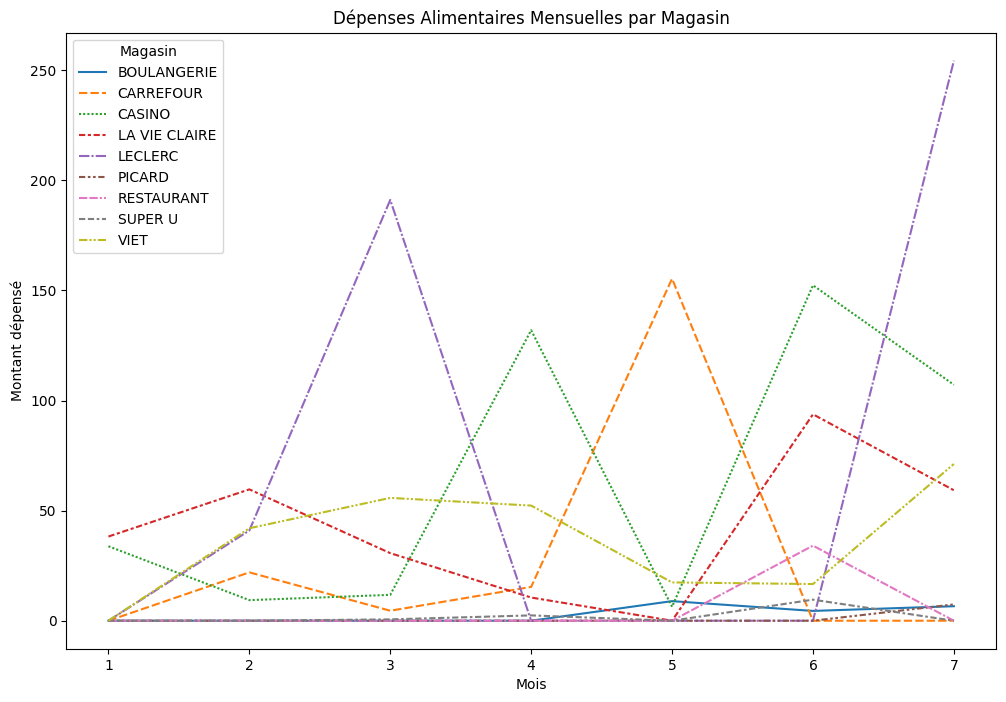

In [20]:
# Visualisation
plt.figure(figsize=(12, 8))
sns.lineplot(data=depenses_mensuelles_magasin)
plt.title('Dépenses Alimentaires Mensuelles par Magasin')
plt.xlabel('Mois')
plt.ylabel('Montant dépensé')
plt.legend(title='Magasin')
plt.show()

In [21]:
depenses_mensuelles_magasin['Total'] = depenses_mensuelles_magasin.sum(axis=1, numeric_only=True)
depenses_mensuelles_magasin['Ville'] = depenses_mensuelles_magasin['CASINO'] + depenses_mensuelles_magasin['LA VIE CLAIRE'] + depenses_mensuelles_magasin['SUPER U']
depenses_mensuelles_magasin['Grande surface'] = depenses_mensuelles_magasin['CARREFOUR'] + depenses_mensuelles_magasin['LECLERC']
data_visu = depenses_mensuelles_magasin[['Ville', 'Grande surface', 'Total']]
data_visu

Libellé simplifié,Ville,Grande surface,Total
mois_tri,,,
1,72.06,0.00,72.06
2,69.01,62.94,173.95
3,43.06,195.68,294.53
4,144.92,15.36,212.58
5,6.36,155.34,188.00
6,255.68,0.00,310.90
7,166.44,254.36,505.99


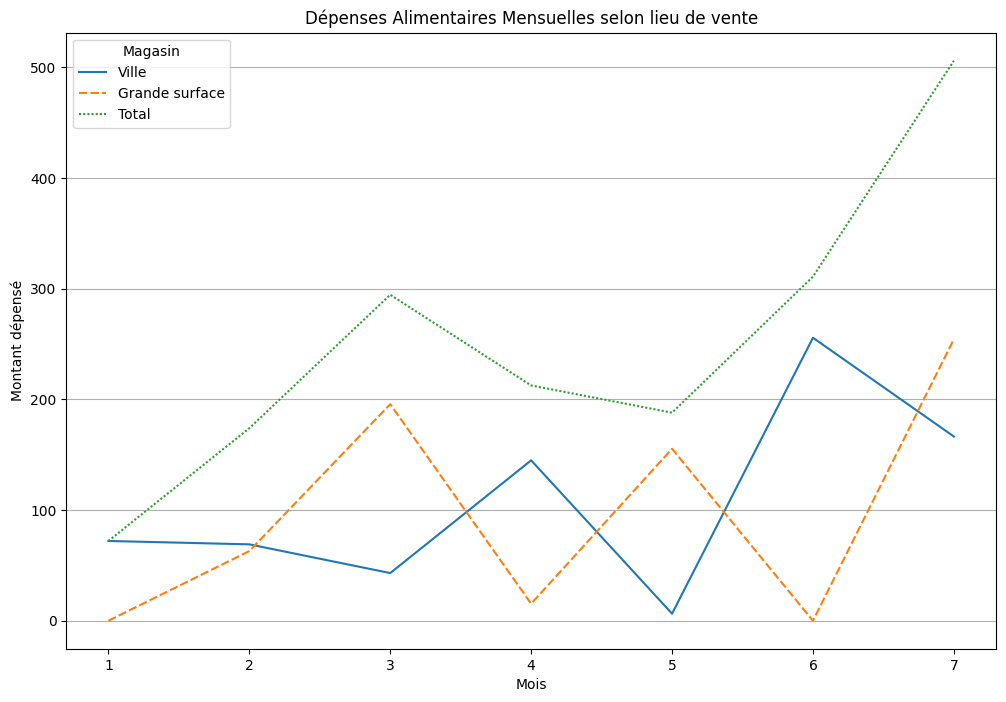

In [22]:
# Visualisation
plt.figure(figsize=(12, 8))
sns.lineplot(data=data_visu)
plt.title('Dépenses Alimentaires Mensuelles selon lieu de vente')
plt.xlabel('Mois')
plt.ylabel('Montant dépensé')
plt.legend(title='Magasin')
plt.grid(axis='y')
plt.show()

In [29]:
print(f"La moyenne :\n {depenses_mensuelles_magasin.mean()}")

La moyenne :
 Libellé simplifié
BOULANGERIE         2.848571
CARREFOUR          28.171429
CASINO             64.684286
LA VIE CLAIRE      41.735714
LECLERC            69.497143
PICARD              1.057143
RESTAURANT          4.872857
SUPER U             1.798571
VIET               36.478571
Total             251.144286
Ville             108.218571
Grande surface     97.668571
dtype: float64


In [28]:

print(f"La median :\n {depenses_mensuelles_magasin.median()}")

La median :
 Libellé simplifié
BOULANGERIE         0.00
CARREFOUR           4.54
CASINO             33.82
LA VIE CLAIRE      38.24
LECLERC             0.00
PICARD              0.00
RESTAURANT          0.00
SUPER U             0.00
VIET               42.00
Total             212.58
Ville              72.06
Grande surface     62.94
dtype: float64
